# Multiple Linear Regression

Multiple linear regression is when we try to predict one response variable from multiple independent variables. This means that, instead of your equation being: $$y = ax + b$$ Your equation instedad becomes: $$y = a_0 + a_1 x_1 + a_2 x_2 + \cdots$$

Here are some assumptions we are making when we use this technique:
1. Linear relationship between response variable and predictor variables
2. Multivariate Normality 
    * The <strong>residuals</strong> are each normally distributed
3. No Multicollinearity
    * Predictor variables are independent of each other
        * There should be little or no correlation between the variables
4. Homoscedasticity
    * Variance of residuals are roughly the same across all independent variables

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in the data

df = pd.read_csv("auto_data.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""


Let's try and predict mpg from the rest of the data using multiple linear regression.

Just by glancing at the data you can see that car name and origin likely will not be good predictors as car name holds no real quantitative descriptor of the car, and cars are generally made the same no matter where they are from, so let's drop them from the dataframe…

In [3]:
df.drop(['car name', 'origin'], 1, inplace = True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


# Multicollinearity

### Pairs Plots

Multicollinearity orrurs when too many of your predicting variables are highly correlated with one another. This is a bad thing because it increases the variance of the regression coefficients, making them harder to interperet.

ie: A coeffieicnt may be negative, when in reality the factors are positively correlated, and vice versa.

You can read more about multicollinearity [here](http://blog.minitab.com/blog/understanding-statistics/handling-multicollinearity-in-regression-analysis)

As an attempt to combat multicollinearity, we can look at a pairs plot.

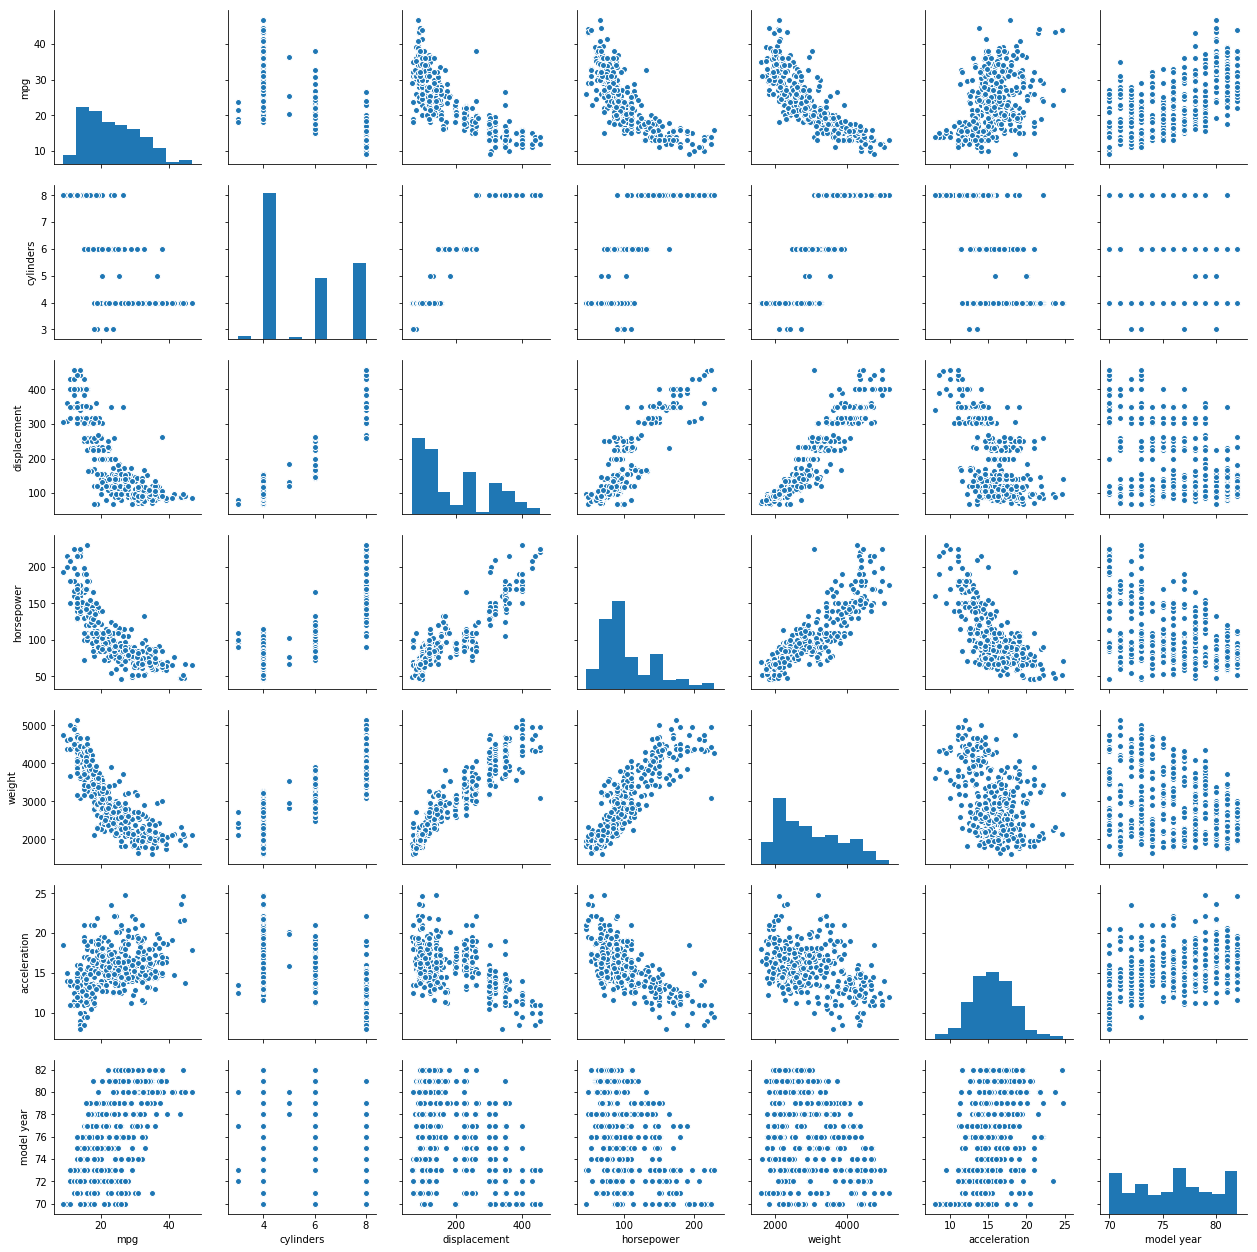

In [4]:
import seaborn as sns

pairs = sns.pairplot(df, diag_kind = "hist")
plt.show()

### Ways of dealing with Multicollinearity

There are a few ways in which you can deal with multicollinearity:

1. Remove highly correlated predictors from the data drame
    * If you can see in the pairs plot that two predictors are highly correlated, they are basically conveying the same information and so one of the predictors can be removed from the data frame.
        * Alternatively to simply removing a predictor, you can find some combination of the two predictors (like the mean) and replace both columns with that.


2. Use Partial Least Squares Regression (PLS) or Principal Component Analysis (PCA)
    * These regression methods will remove the highly correlated predictors and construct the model on the less correlated predictors.

For this model, however, I am not going to remove any of the highly correlated predictors because, while there is a slight risk of multicollinearity, they are all also very good predictors of mpg (what we are trying to predict) and will help our model.

# Dummy Variables

There is one more thing that we need to do before we are ready to make our model. Notice how a few of our variables (cylinders, and model year), while numeric in data type, are really categorical variables. That means that while they are represented by numbers, those numbers are not representatitive of what they are quantitatively, and so could unfairly bias your model.

Dummy Variables are just new boolean (0 or 1) variables that say if the observation in the data frame either is, or isn't whatever that column is a dummy for. There is a dummy column like this for every value in the column that you are getting dummies for.

In [367]:
df = pd.get_dummies(df, columns = ['cylinders', 'model year'])
df.head()

,mpg,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,...,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,18.0,307.0,130,3504,12.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165,3693,11.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150,3436,11.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150,3433,12.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140,3449,10.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Making our model

In [355]:
from sklearn.linear_model import LinearRegression # sklearn Linear Regression regressor
from sklearn.model_selection import train_test_split # Sklearn train_test_split

# Partition 80% of the data for training and 20% for testing
train, test = train_test_split(df, test_size = 0.2)

# training predictors
x_train = train.drop(['mpg'], 1)
# training y-values
y_train = train['mpg']

# testing predictors
x_test = train.drop(['mpg'], 1)
# testing y-values
y_test = train['mpg']


# Set our regression model to Linear Regression()
regr = LinearRegression()

# Train our model ('fit' synonomous to 'train)
regr.fit(x_train, y_train)

# Let's get our predictions of the y-test values
predictions = pd.Series(regr.predict(x_test))


# set the indexes of the predictions and actual values to the same thing so that we can perform arithmetic
predictions.index = range(len(predictions))
y_test.index = range(len(y_test))

# Find the differences between the actual and predicted values
differences = abs(predictions - y_test)

# calculating the percent error
errors = differences/y_test * 100
mean_error = np.mean(errors)

# Getting an r^2 value
from sklearn.metrics import r2_score
r2 = r2_score(y_true = y_test, y_pred = predictions)

print('Average difference: ', np.mean(differences))
print('\nAverage Percent Error:', mean_error)
print('\nIntercept:', regr.intercept_)
print('\nRegression Coefficients:', regr.coef_)
print('\nr^2:', r2)

Average difference:  2.169238546276664

Average Percent Error: 9.791874300888656

Intercept: 39.9286594894

Regression Coefficients: [  2.77322547e-03  -2.70207978e-02  -5.36363609e-03   5.05316155e-02
  -4.24255701e+00   1.74742019e+00   2.17076001e+00  -1.37077889e+00
   1.69515569e+00  -3.05905238e+00  -1.71929912e+00  -3.57703452e+00
  -3.46952457e+00  -1.68431715e+00  -1.65636970e+00  -1.34290150e+00
  -1.13826409e-01   5.69014680e-01   1.22305390e+00   6.58819154e+00
   3.32641983e+00   4.91564541e+00]

r^2: 0.861007023693


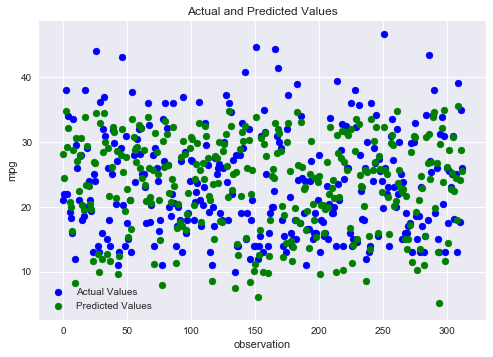

In [252]:
plt.scatter(y_test.index, y_test, color = 'b')
plt.scatter(predictions.index, predictions, color = 'g')
plt.legend(["Actual Values", "Predicted Values"])
plt.xlabel('observation')
plt.ylabel('mpg')
plt.title('Actual and Predicted Values')
plt.show()

What might we do to improve our model?